# Project Header

---

**Name:**  
Joe Z

**Date:**  
March 24, 2025

**Title:**  
Cmp-262 - Project part 01 - the cleaning

---



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data and Rename Columns

In this section, we will:

- Load the datasets.
- Apply column renaming to ensure each dataset has consistent and manageable column names.

This step helps standardize the data and makes further analysis easier to manage.


# Column Conversion Lookup Data

This section loads the **column conversion lookup data**, which serves two purposes:

- Shortens long column names, making them easier to work with.
- Preserves a reference to the **original survey questions**(a.k.a the original columnn names) by keeping a record of this data.

This approach improves **readability** and keeps your analysis more manageable, while ensuring the original context of the data is not lost.


In [5]:
df_col_lookup = pd.read_csv('column_lookup_table.csv')

In [6]:
df_col_lookup.head()

,gpt_short_names,original_column_names
0,age,Age
1,att_cost,To what extent did the following impact your d...
2,att_extrac,To what extent did the following impact your d...
3,att_fac_staff,To what extent did the following impact your d...
4,att_fam_ref,To what extent did the following impact your d...


## Utility Functions for Column Renaming

This section defines a few **helper functions** to streamline the process of renaming columns.

These functions will help:

- Standardize column names across datasets.
- Improve consistency and readability.
- Simplify any future column mapping tasks.
- Provides a function to get the survey question from the column name.


In [8]:
def rename_columns(df):
    """
    renames the columns of the a dataset.
    """
    # get the base list of column names to rename - each dataset column names may be slightly different
    col_names = list(df.columns)
    
    # only get the rename data we need, based on dataset column names
    # create a new dataframe(df_col_data_for_rename) that holds the lookup inforamtion required to rename columns in our passed-in dataframe. 
    df_col_data_for_rename = df_col_lookup[df_col_lookup["original_column_names"].isin(col_names)]

    # Create the dictionary for the rename...
    # use our filtered column data specific to our source dataframe to gather the key and values for our rename dictionary.
    original_col_names         = df_col_data_for_rename["original_column_names"]
    gpt_short_names            = df_col_data_for_rename["gpt_short_names"]
    grouped_key_values_pairs   = zip(original_col_names, gpt_short_names)
    rename_col_dict            = dict(grouped_key_values_pairs)

    # rename the column names using the above construted dictionary (rename_col_dict)
    df.rename(columns=rename_col_dict, inplace=True)

def get_question_from_col_name(col_name):
    """
    returns the survey question associated with the column 
    """
    df_question_name = df_col_lookup[df_col_lookup["gpt_short_names"].isin([col_name])]
    return df_question_name["original_column_names"]
    

    

## Load Datasets and Standardize Column Names

In this section, we will:

- Load all required datasets.
- Apply consistent column renaming across all datasets to ensure uniformity.

Standardizing column names simplifies data merging, comparison, and future processing steps.


In [10]:
df20 = pd.read_csv('./majors_data/Majors Survey Results - Fall 2020.csv')
rename_columns(df20)

In [11]:
df21 = pd.read_csv('./majors_data/Majors Survey Results - Fall 2021.csv')
rename_columns(df21)

In [12]:
df22 = pd.read_csv('./majors_data/Majors Survey Results - Fall 2022.csv')
rename_columns(df22)

In [13]:
df23 = pd.read_csv('./majors_data/Majors Survey Results - Fall 2023.csv')
rename_columns(df23)

In [14]:
df24 = pd.read_csv('./majors_data/Majors Survey Results - Fall 2024.csv')
rename_columns(df24)
df24.head(0)

,timestamp,course,hear_web,hear_sm,hear_ce,hear_fam,hear_cs,hear_alum,hear_hs_tchr,hear_hs_gc,...,src_emp,src_wfd,src_nj_wfd,src_oth,comp_1st,interest_in_more_classes,why_more_comp,gender,ethnicity,age


## Assessing Data Compatibility for Merging

We need to determine whether the datasets can be successfully merged.  
A preliminary analysis reveals that:

- The **2021 dataset** has the **same columns** as the **2024 dataset**, meaning these two datasets should be compatible for merging.
- The **2022 dataset** has the **same columns** as the **2023 dataset**, meaning these two datasets should also be compatible for merging.

---

### Next Steps

In the following steps, we will:

1. **Verify column consistency** across these dataset pairs.
2. **Execute the merges** if the columns align as expected.


In [16]:
col_names20 = list(df20.columns)
col_names21 = list(df21.columns)
col_names22 = list(df22.columns)
col_names23 = list(df23.columns)
col_names24 = list(df24.columns)

##### Quick Comparison: Columns in 2022/2023 Data Missing from 2024 Data.

In [18]:
set(col_names22).symmetric_difference(set(col_names24))

{'ev_hoc_2223o', 'hear_hm_2223o'}

##### Quick Test: get the question for the column named: 'hear_hm_2223o'

In [20]:
get_question_from_col_name('hear_hm_2223o')

46    How did you hear about County College of Morri...
Name: original_column_names, dtype: object

## Merging 2021 and 2024 Data

- **Merge** the 2021 and 2024 datasets.
- **Validate** the merged data counts to ensure consistency.

In [22]:
if col_names21 == col_names24:
    df21_24 = pd.concat([df21, df24], ignore_index=True)

    # quick validate of merge - total expected rows and number of columns
    if (df21.shape[0]+df24.shape[0]) == df21_24.shape[0] \
             and df21.shape[1] == df24.shape[1] == df21_24.shape[1]:
        print("PASSED: looks like merge worked!")
    else:
        print("FAILED: please revisit the merged data!")
    
    
    

PASSED: looks like merge worked!


## Merging 2022 and 2023 Data

- **Merge** the 2022 and 2023 datasets.
- **Validate** the merged data counts to ensure consistency.

In [24]:
if col_names22 == col_names23:
    df22_23 = pd.concat([df22, df23], ignore_index=True)

    # quick validate of merge- total expected rows and number of columns
    if (df22.shape[0]+df23.shape[0]) == df22_23.shape[0] \
             and df22.shape[1] == df23.shape[1] == df22_23.shape[1]:
        print("PASSED: looks like merge worked!")
    else:
        print("FAILED: please revisit the merged data!")
    
    
    

PASSED: looks like merge worked!


## Merging Datasets: Combining 2021/2024 with 2022/2023

In this section, we will **merge** the combined 2021/2024 dataset with the combined 2022/2023 dataset.

### Key Consideration

The **2022/2023 data** contains **two additional columns** with names ending in `_2223o`, where:
- The suffix `_2223o` indicates these columns exist **only** in the 2022/2023 data.
- These columns will be retained in the merged dataset for completeness.

This step ensures that there is consistancy by checking counts.


In [26]:
df21_to_24 = pd.concat([df22_23, df21_24], ignore_index=True)

# quick validate of merge
if (df22_23.shape[0]+df21_24.shape[0]) == df21_to_24.shape[0] \
            and df21_to_24.shape[1] == df22_23.shape[1]  > df21_24.shape[1]:
    print("PASSED: looks like merge worked!")
else:
    print("FAILED: please revisit the merged data!")


PASSED: looks like merge worked!


## Final Step: Merging All Datasets (2020 to 2024)

In this final step, we will **merge all datasets together**, combining:

- The merged **2021 to 2024** dataset.
- The **2020** dataset.

### Special Considerations

- The **2020 dataset** contains **two columns that do not exist in later years**.
    - These columns have names ending with `_2020o`, where the **`o` stands for "Only"**.
- Starting in **2021**, a number of new columns were added.
    - These columns are present in all datasets from **2021 onward**.
    - These columns have names ending with `_2021a`, where the **`a` stands for "Added"**.

### Summary

This final merge ensures that:
- All years are represented in a single dataset.
- Columns unique to certain years are preserved for completeness.
- Column naming conventions document the **origin** and **purpose** of special columns.


In [28]:
df = pd.concat([df20, df21_to_24], ignore_index=True)
# quick validate of merge
if (df20.shape[0]+df21_to_24.shape[0]) == df.shape[0] \
         and df21_to_24.shape[1]+2 == df.shape[1]:
    print("PASSED: looks like merge worked!")
else:
    print("FAILED: please revisit the merged data!")

PASSED: looks like merge worked!


## Preparing Year Data for Analysis

Some of our upcoming analysis requires accurate **year information**.  
In this section, we will **clean and correct issues** related to the timestamp data to ensure the year values accessable.


## Fixing Timezone Issues in Timestamps

During data cleaning, we discovered that certain timestamps contain the timezone **AST**, which caused conversion errors.

### Key Insight
- In practice, **AST (Atlantic Standard Time)** is often equivalent to **EST (Eastern Standard Time)** for our data context.
- To resolve this, we will **replace AST with EST** to ensure smooth timestamp conversion.

This adjustment will help prevent errors and ensure consistent handling of date and time data.


In [31]:
df['timestamp'] = df['timestamp'].str.replace('AST', 'EST', regex=False)

In [32]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y/%m/%d %I:%M:%S %p %Z', errors='coerce')
df['timestamp'].isna().sum() == 0  # True means all went well

True

In [33]:
# Extracting the year as an integer using the "dt" accessor of the timestamp object
df['year'] = df['timestamp'].dt.year.astype('Int64')
df['year'].isna().sum() == 0  # True means all went well

True

## Consolidated Dataset: Handling Year-Specific Columns

At this stage, we have a single DataFrame (`df`) that consolidates data from **five years** of major surveys.

---

### Handling Year-Specific Columns

Some columns are relevant only to specific survey years. To ensure consistency:

- We **set values to `NaN` (`pd.NA`)** for rows in which a column does not apply based on the survey year.
- This ensures the DataFrame structure is preserved while maintaining accurate, year-aware data handling.

---

### Converting Multi-Valued Data (2020 'Motivation' Column)

The **2020 survey** stores motivation data in a **single column** named `moti_deg_all_2020o`, containing **multi-valued responses separated by semicolons**.

In contrast, beginning with the **2021 survey**, each motivation response is stored in **separate columns**, with binary indicators (`Yes` or `No`) for each response option.

**Goal:** Convert the 2020 semicolon-separated motivation data into the **2021-style column format**, using individual columns to represent each motivation response.

This allows for consistent analysis across all years and simplifies filtering and comparison.

---

### Column Naming Conventions

| Suffix | Meaning                                                  |
|--------|----------------------------------------------------------|
| `'o'`  | Column applies to **one or more** specific years only    |
| `'a'`  | Column was **added in a given year** and appears in **subsequent years** |

These naming conventions help maintain clarity and make it easier to filter or analyze data across different survey years.


## Understanding the Derivation of the 2021 'Motivation' Columns from 2020 Data

The following cells provide insight into how we derived the **2021-style 'motivation' columns** using data from the **2020 multi-valued 'motivation' column**.

### Step-by-Step Breakdown:

1. **List all year-specific columns**  
   This provides context on which columns are exclusive to certain survey years.

2. **Survey unique responses from the 2020 'motivation' column**  
   The 2020 data is stored in a single, semicolon-separated column (`moti_deg_all_2020o`). We extract and review all unique responses.

3. **Parse the 2021+ column names and extract associated answer text**  
   Beginning in 2021, each motivation option is represented by its own column with a `Yes` or `No` value. We parse these column names and extract the original survey text they correspond to.

4. **Manual mapping of 2020 responses to 2021+ format**  
   Each unique 2020 motivation response is manually matched to its corresponding 2021+ column(s). This mapping is used to translate and restructure the 2020 data into the newer format.

5. **Run code to transformation 2020 responces to 2021+ data standards**  
   Using the above manual mapping, we create code to update 2021+ 'motivation' columns base on data contained in the 2020 'motivation' column.

6. **Set values to `NaN` (`pd.NA`) for year-specific columns where data does not apply.**  
   For columns that only exist in certain survey years, assign `NaN` to rows from other years to maintain a consistent structure and clearly indicate missing or non-applicable data.

7. **Run a quick test as a sanity check**  
   A simple test is executed to ensure the mapping and transformation logic are functioning as expected.

---

This process ensures consistency in how motivation responses are stored and analyzed across all years of data.


In [36]:
# 1. List all year-specific columns

# columns that are dataset specific
print(set(col_names20).symmetric_difference(set(col_names23)))

{'ev_virt_info_2020o', 'moti_deg_all_2020o', 'mot_curr_tech_2021a', 'ev_tt_virt_2021a', 'mot_reloc_2021a', 'mot_job_comp_2021a', 'mot_tr_bach_2021a', 'mot_career_adv_2021a', 'mot_job_disp_2021a', 'mot_career_ch_2021a', 'mot_fin_2021a', 'mot_pers_enr_2021a', 'hear_hm_2223o', 'mot_tr_hs_2021a', 'mot_prof_dev_2021a', 'mot_it_cert_2021a', 'ev_hoc_2223o'}


In [37]:
# 2. Survey unique responses from the 2020 'motivation' column

# Create a set to store unique values
all_2020_values = set()

# parse data from composit column'moti_deg_all_2020o' and place them into the 'all_values' set
df['moti_deg_all_2020o'].dropna().apply(lambda x: all_2020_values.update(x.split(';')))

# Print the result
for motive in sorted(all_2020_values):
    print("\'"+motive+"\'")


'Career Advancement'
'Career Change'
'Family'
'Financial'
'I like IT'
'IT Industry Certifications'
'Job Displacement'
'Personal Enrichment'
'Professional Development'
'Relocation'
'Something to fall back on if my main career choice falls through.'
'To get a job in the computing field'
'To keep current in tech industry'
'Transfer credits back to HS degree (ShareTime, Challenger Program)'
'Transfer to bachelor's level program'
'Transferring to NJIT, Want experience in the field of Computer Science before I transfer.'
'networking and hacking systems '


In [38]:
# create column lookup utils to get 'original' questions related to columns


df_col_lookup = pd.read_csv('column_lookup_table.csv')

def rename_columns(df):
    """
    renames the columns of the a dataset.
    """
    # get the base list of column names to rename - each dataset column names may be slightly different
    col_names = list(df.columns)
    
    # only get the rename data we need, based on dataset column names
    df_col_data_for_rename = df_col_lookup[df_col_lookup["original_column_names"].isin(col_names)]

    # Create the dictionary for the rename...
    original_col_names         = df_col_data_for_rename["original_column_names"]
    gpt_short_names            = df_col_data_for_rename["gpt_short_names"]
    grouped_key_values_pairs   = zip(original_col_names, gpt_short_names)
    rename_col_dict            = dict(grouped_key_values_pairs)

    # rename the column names using the construted tuple!
    df.rename(columns=rename_col_dict, inplace=True)


# create the dictonary to lookup question from column name
original_col_names         = df_col_lookup["original_column_names"]
gpt_short_names            = df_col_lookup["gpt_short_names"]
grouped_key_values_pairs   = zip(gpt_short_names,original_col_names)
col_to_question_dict       = dict(grouped_key_values_pairs)

# def column2Question(column_name):
#     return col_to_question_dict[column_name]

def get_question_from_col_name(column_name):
    return col_to_question_dict[column_name]

    

In [39]:
# 3. Parse the 2021+ column names and extract associated answer text

import re

def extract_question_answer(question):
    # the question have the answer within square brackets. Use regex to extract that data.
    # Example Question: What motivated you to seek a computing degree/certificate at CCM?  [Career Advancement]
    all_values = re.findall(r'\[(.*?)\]', question)
    return ';'.join(all_values)

    
motivtion_columns =  ['mot_career_adv_2021a','mot_career_ch_2021a','mot_curr_tech_2021a', \
                          'mot_fin_2021a','mot_it_cert_2021a','mot_job_comp_2021a','mot_job_disp_2021a', \
                          'mot_pers_enr_2021a','mot_prof_dev_2021a','mot_reloc_2021a','mot_tr_bach_2021a', \
                          'mot_tr_hs_2021a']


motivation_column_to_text_dict = dict()
for m in motivtion_columns:
     motivation_column_to_text_dict[m] = extract_question_answer(get_question_from_col_name(m))
     print(m,'\n', \
           get_question_from_col_name(m),'\n', \
           motivation_column_to_text_dict[m],'\n')

mot_career_adv_2021a 
 What motivated you to seek a computing degree/certificate at CCM?  [Career Advancement] 
 Career Advancement 

mot_career_ch_2021a 
 What motivated you to seek a computing degree/certificate at CCM?  [Career Change] 
 Career Change 

mot_curr_tech_2021a 
 What motivated you to seek a computing degree/certificate at CCM?  [To keep current in tech industry] 
 To keep current in tech industry 

mot_fin_2021a 
 What motivated you to seek a computing degree/certificate at CCM?  [Financial] 
 Financial 

mot_it_cert_2021a 
 What motivated you to seek a computing degree/certificate at CCM?  [IT Industry Certifications] 
 IT Industry Certifications 

mot_job_comp_2021a 
 What motivated you to seek a computing degree/certificate at CCM?  [To get a job in the computing field] 
 To get a job in the computing field 

mot_job_disp_2021a 
 What motivated you to seek a computing degree/certificate at CCM?  [Job Displacement] 
 Job Displacement 

mot_pers_enr_2021a 
 What motiva

### Step 4: Manual Mapping of 2020 Responses to 2021+ Format

After analyzing the unique responses from the 2020 `moti_deg_all_2020o` column, we manually mapped each to its corresponding 2021+ motivation column. This ensures consistency in representation across survey years.

Below is the mapping between **2021 column names** and their **associated 2020 responses**:

| 2021 Column Name         | Mapped 2020 Response(s)                                                                                   |
|--------------------------|------------------------------------------------------------------------------------------------------------|
| `mot_career_adv_2021a`   | Career Advancement                                                                                        |
| `mot_career_ch_2021a`    | Career Change                                                                                             |
| `mot_curr_tech_2021a`    | Networking and hacking systems<br/>I like IT                                                              |
| `mot_fin_2021a`          | Financial                                                                                                 |
| `mot_it_cert_2021a`      | IT Industry Certifications                                                                                |
| `mot_job_comp_2021a`     | To get a job in the computing field<br/>Something to fall back on if my main career choice falls through. |
| `mot_job_disp_2021a`     | Job Displacement                                                                                          |
| `mot_pers_enr_2021a`     | Personal Enrichment                                                                                       |
| `mot_prof_dev_2021a`     | Professional Development                                                                                  |
| `mot_reloc_2021a`        | Relocation                                                                                                |
| `mot_tr_bach_2021a`      | Transfer to bachelor's level program<br/>Transferring to NJIT, Want experience in the field of Computer Science before I transfer. |
| `mot_tr_hs_2021a`        | Transfer credits back to HS degree (ShareTime, Challenger Program)                                       |

This manual mapping was used in code to reformat the 2020 responses into the 2021 schema during the transformation process.


In [41]:
# 5. Run code to transformation 2020 responces to 2021+ data standards

import pandas as pd
import re

def update_motivation_columns(df, text_column, condition_mask):
    """
    Updates the DataFrame's motivation-related columns based on the values in the specified text column.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the motivation data.
    text_column (str): The name of the column containing text responses to be evaluated.
    condition_mask (pd.Series): A boolean mask indicating which rows should be altered.

    Returns:
    pd.DataFrame: The updated DataFrame with modified motivation columns.

    NOTE: 
    ChatGPT helped create this function.
    """

    def contains(text, keywords, exclude=None):
        """
        Helper function to check if text contains any keyword (case-insensitive),
        and optionally exclude terms.
        """
        if pd.isna(text):
            return False
        text = text.lower()
        if any(word in text for word in keywords):
            if exclude:
                return not any(word in text for word in exclude)
            return True
        return False

    # Apply conditions to update respective columns
    df.loc[condition_mask, "mot_fin_2021a"]        = df[text_column].apply(lambda x: "Yes" if contains(x, ["financ"]) else "No")
    df.loc[condition_mask, "mot_prof_dev_2021a"]   = df[text_column].apply(lambda x: "Yes" if contains(x, ["professional development"]) else "No")
    df.loc[condition_mask, "mot_job_disp_2021a"]   = df[text_column].apply(lambda x: "Yes" if contains(x, ["job displacement"]) else "No")
    df.loc[condition_mask, "mot_job_comp_2021a"]   = df[text_column].apply(lambda x: "Yes" if contains(x, ["job", "career"], ["job displacement"]) else "No")
    df.loc[condition_mask, "mot_it_cert_2021a"]    = df[text_column].apply(lambda x: "Yes" if contains(x, ["cert"]) else "No")
    df.loc[condition_mask, "mot_pers_enr_2021a"]   = df[text_column].apply(lambda x: "Yes" if contains(x, ["personal enrichment"]) else "No")
    df.loc[condition_mask, "mot_tr_bach_2021a"]    = df[text_column].apply(lambda x: "Yes" if contains(x, ["transfer to"], ["hs"]) else "No")
    df.loc[condition_mask, "mot_tr_hs_2021a"]      = df[text_column].apply(lambda x: "Yes" if contains(x, ["transf"]) and contains(x, ["hs", "high school"]) else "No")
    df.loc[condition_mask, "mot_career_ch_2021a"]  = df[text_column].apply(lambda x: "Yes" if contains(x, ["career change"]) else "No")
    df.loc[condition_mask, "mot_reloc_2021a"]      = df[text_column].apply(lambda x: "Yes" if contains(x, ["relocation"]) else "No")
    df.loc[condition_mask, "mot_career_adv_2021a"] = df[text_column].apply(lambda x: "Yes" if contains(x, ["career advancement"]) else "No")
    df.loc[condition_mask, "mot_curr_tech_2021a"]  = df[text_column].apply(lambda x: "Yes" if contains(x, [" it ", "system"], ["cert"]) else "No")
    
    # Set ev_tt_virt_2021a to NaN
    df.loc[condition_mask, "ev_tt_virt_2021a"]     = pd.NA

    return df


# use data from 2020 motivation columns  to populate the 2021 modivation column
year_column = df["year"]

years_with_valid_data      = year_column.isin([2021,2022,2023,2024])  
years_that_will_be_altered = ~years_with_valid_data 

df = update_motivation_columns(df,'moti_deg_all_2020o',years_that_will_be_altered)

In [42]:
# 6. Set values to NaN (pd.NA) for year-specific columns where data does not apply.

# update 2022 and 2023 "only" column values for other years 
years_with_valid_data      = year_column.isin([2022, 2023])  
years_that_will_be_altered = ~years_with_valid_data 

df.loc[years_that_will_be_altered, "ev_hoc_2223o"]  = pd.NA 
df.loc[years_that_will_be_altered, "hear_hm_2223o"] = pd.NA 

# update 2020 "only" column values for other years 
years_with_valid_data      = year_column.isin([2020])  
years_that_will_be_altered = ~years_with_valid_data 

df.loc[years_that_will_be_altered, "ev_virt_info_2020o"]  = pd.NA
df.loc[years_that_will_be_altered, "moti_deg_all_2020o"]  = pd.NA 

In [43]:
# 7. Run a quick test as a sanity check

# Note: used chatGPt to write this test.

def validate_motivation_columns(df, text_column, condition_mask):
    """
    Validates that the motivation-related columns in the DataFrame match expected values.
    Skips rows where the text_column is null or empty.
    Shows detailed output of all *_2021a column values per row.
    """

    def contains(text, keywords, exclude=None):
        if pd.isna(text) or str(text).strip() == "":
            return False
        text = text.lower()
        if any(word in text for word in keywords):
            if exclude:
                return not any(word in text for word in exclude)
            return True
        return False

    columns_to_check = {
        "mot_fin_2021a":       lambda x: "Yes" if contains(x, ["financ"]) else "No",
        "mot_prof_dev_2021a":  lambda x: "Yes" if contains(x, ["professional development"]) else "No",
        "mot_job_disp_2021a":  lambda x: "Yes" if contains(x, ["job displacement"]) else "No",
        "mot_job_comp_2021a":  lambda x: "Yes" if contains(x, ["job", "career"], ["job displacement"]) else "No",
        "mot_it_cert_2021a":   lambda x: "Yes" if contains(x, ["cert"]) else "No",
        "mot_pers_enr_2021a":  lambda x: "Yes" if contains(x, ["personal enrichment"]) else "No",
        "mot_tr_bach_2021a":   lambda x: "Yes" if contains(x, ["transfer to"], ["hs"]) else "No",
        "mot_tr_hs_2021a":     lambda x: "Yes" if contains(x, ["transf"]) and contains(x, ["hs", "high school"]) else "No",
        "mot_career_ch_2021a": lambda x: "Yes" if contains(x, ["career change"]) else "No",
        "mot_reloc_2021a":     lambda x: "Yes" if contains(x, ["relocation"]) else "No",
        "mot_career_adv_2021a":lambda x: "Yes" if contains(x, ["career advancement"]) else "No",
        "mot_curr_tech_2021a": lambda x: "Yes" if contains(x, [" it ", "system"], ["cert"]) else "No",
    }

    suffix_cols = [col for col in df.columns if col.endswith("_2021a")]

    passed_count=0
    failed_count=0
    for idx in df[condition_mask].index:
        text = df.at[idx, text_column]
        if pd.isna(text) or str(text).strip() == "":
            continue  # skip blank/null input rows

        row_passed = True
        for col, func in columns_to_check.items():
            expected = func(text)
            actual = df.at[idx, col]
            if actual != expected:
                print(f"\033[91mFAILED:\033[0m Row {idx} '{text}' -> {col} expected '{expected}', got '{actual}'")
                failed_count = failed_count_1
                row_passed = False
        if row_passed:
            # print(f"PASSED: Row {idx} '{text}'")
            passed_count = passed_count+1
        # for col in suffix_cols:
        #    print(f"    {col}: {df.at[idx, col]}")
        # print()

    print('Test PASSED count: ', passed_count)
    print('Test FAILED count: ', failed_count)

validate_motivation_columns(df,'moti_deg_all_2020o',years_that_will_be_altered)

Test PASSED count:  0
Test FAILED count:  0


## Cleaning Missing Values: Questions on Decision to Attend County College of Morris

This section focuses on **cleaning missing values** for all survey questions related to  
*"Your decision to attend County College of Morris."*

### Identifying Relevant Columns

- All column names related to these questions **begin with**: `att_`
- These columns capture factors influencing students' decisions to attend the college.

### Objective

- Standardize missing values.
- Ensure data completeness for analysis related to student decision factors.


### Adjust Display Settings

For easier review and debugging, we are temporarily **adjusting the display properties** to show the **maximum number of rows and columns**.



#### Quick Peek at `att_cost` Column

In [47]:
get_question_from_col_name('att_cost')

'To what extent did the following impact your decision to attend County College of Morris? [Affordable cost]'

In [48]:
df['att_cost'].value_counts(dropna=False)

att_cost
High Impact    722
Some Impact    254
No Impact      140
NaN             84
Name: count, dtype: int64

# Here We Go: Utility Function for Column Cleanup

### Overview

The function below performs a **multi-step process** to clean and review columns based on a specified prefix.

### What This Function Does

1. **Identifies all columns** whose names start with the given prefix.
2. **Displays value counts** for each of these columns before any changes.
3. **Fixes missing values** within each of these columns.
4. **Displays value counts** again after the fixes, to confirm the changes.

This structured approach ensures we handle missing values consistently across all relevant columns.


In [50]:
def fillna_for_columns(df, col_starts_with_str, fillna_value):
    """
    Replaces missing column values for a column that starts with 
    a patteren specified in 'col_starts_with_str',
    """
    all_columns_names = list(df.columns)

    # get a list of all columns names that start with the 'col_starts_with_str'
    att_names = [name for name in all_columns_names if name.startswith(col_starts_with_str)]

    # print("\n====> Values Before fix")
    # for name in att_names:
    #     print(df[name].value_counts(dropna=False),'\n')

    df[att_names] = df[att_names].fillna(fillna_value)

    # print("\n====> Values After fix")
    # for name in att_names:
    #     print(df[name].value_counts(dropna=False),'\n')


### Updating Columns with the `att_` Prefix

In [52]:
fillna_for_columns(df, 'att_','No Impact' )

## Handling Missing Values: Factors Influencing Enrollment in Computing Courses

This section addresses **missing values** in survey questions related to:  
*"To what extent did the following activities or experiences impact your decision to enroll in a computing course at CCM?"*

### Identifying Relevant Columns

- All columns associated with these questions **begin with** the prefix: `imp_`

### Objective

- **Standardize missing values** across these columns.
- Ensure data consistency for future analysis of factors influencing computing course enrollment.


In [54]:
get_question_from_col_name('imp_mhs_comp')

'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Middle/High school computing class]'

### Updating Columns with the `imp_` Prefix

In [56]:
fillna_for_columns(df, 'imp_','No Impact' )

## Handling Missing Values: Information Sources for CCM Computing Programs

This section addresses **missing values** in survey questions related to:  
*"Did you receive information about the CCM computing programs from any of the following sources?"*

### Identifying Relevant Columns

- All columns related to these questions **begin with** the prefix: `src_`

### Objective

- **Standardize missing values** in these columns.
- Ensure consistent data for analyzing how students learned about CCM’s computing programs.


In [58]:
get_question_from_col_name('src_oth')

'Did you receive information about the CCM computing programs from any of the following sources? [Other]'

In [59]:
df['src_oth'].value_counts(dropna=False)

src_oth
No              638
NaN             340
Don't recall    115
Yes             107
Name: count, dtype: int64

### Updating Columns with the `src_` Prefix

In [61]:
fillna_for_columns(df, 'src_',"Don't recall" )

## Handling Missing Values: Motivation for Pursuing a Computing Degree/Certificate

This section addresses **missing values** in survey questions related to:  
*"What motivated you to seek a computing degree or certificate at CCM?"*

### Identifying Relevant Columns

- All columns related to these questions **begin with** the prefix: `mot_`

### Objective

- **Standardize missing values** to ensure consistency.
- Support future analysis of the factors that motivated students to pursue a computing degree or certificate at CCM.


In [63]:
get_question_from_col_name('mot_job_comp_2021a')

'What motivated you to seek a computing degree/certificate at CCM?  [To get a job in the computing field]'

In [64]:
df['mot_job_comp_2021a'].value_counts(dropna=False)

mot_job_comp_2021a
Yes    779
NaN    250
No     171
Name: count, dtype: int64

### Updating Columns with the `mot_` Prefix

In [66]:
fillna_for_columns(df, 'mot_',"No" )

# Clean Data to Answer This Question

## Research Question
**How does "interest level" relate to age, and how has that changed over time?**

---

## Relevant Columns

- **`interest_in_more_classes`** — Captures whether students are interested in taking additional computing classes.
- **`age`** — Captures the age of respondents.
- **`year`** — Indicates the survey year.
- **`timestamp`** — Captures the date and time the survey response was submitted.

---

## Next Steps
- Clean and validate data in these columns.
- Explore trends across different age groups and survey years.
- Analyze how interest in more classes varies by age and changes over time.


In [68]:
df.shape

(1200, 95)

## Fix Missing Values in `interest_in_more_classes`

In this step, we will **replace all `NaN` values** in the **`interest_in_more_classes`** column with **0**.

This ensures that missing responses are treated as **no interest in taking additional computing classes**, providing cleaner and more consistent data for analysis.


In [70]:
df['interest_in_more_classes'] = df['interest_in_more_classes'].fillna(0)
df['interest_in_more_classes'].value_counts(dropna=False)

interest_in_more_classes
0.0    860
3.0    115
4.0    107
5.0     72
2.0     28
1.0     18
Name: count, dtype: int64

In [71]:
df['age'].value_counts(dropna=False)

age
18 and younger    450
19-20             377
21-24             188
25-34             123
35-64              56
65+                 6
Name: count, dtype: int64

In [72]:
df['year'].value_counts(dropna=False)

year
2020    298
2021    245
2023    242
2022    218
2024    197
Name: count, dtype: Int64

# Clean Data to Answer the Question

## Research Question
**Compare the race/ethnicity demographics of the survey over time (2020-2024). What changes, if any, are observed over this period?**

---

## Relevant Columns

- **`timestamp`** — Date and time when the survey response was submitted.
- **`ethnicity`** — Respondent's self-identified race/ethnicity.
- **`year`** — Year the survey was conducted.

---

## Next Steps
- Clean and validate these columns to ensure consistency and accuracy.
- Analyze changes in race/ethnicity demographics year by year.
- Identify trends or shifts in representation across the 2020-2024 period.
- Visualize


## Cleaning Data: Handling "Choose not to reply" Responses

For columns where respondents could select multiple options, we will apply the following rule:

- If **"Choose not to reply"** is **one of the selected options**, the entire column value will be **replaced** with `"Choose not to reply"`.

This ensures that the **preference for non-disclosure** is fully respected in the data.

In [75]:
df['ethnicity'] = df['ethnicity'] \
                         .apply(lambda x: 'Choose not to reply' if 'Choose not to reply' in x else x)

## Cleaning Data: Handling Multi-Racial and Multiple Race Selections

This cleaning step applies the following logic to responses where participants selected multiple racial/ethnic categories:

- If **"Multi-Racial"** is one of **three or more selected options**, the value will be **replaced with "Multi-Racial"** as the only value.
- If **fewer than three options** were selected (excluding "Multi-Racial"), we will **keep up to the first two selected options**.

This approach ensures the data remains manageable while still capturing multi-racial identities where appropriate.

This is a work in progrss as I have to look in more details at the count

In [77]:
def multi_racial_check(ethnicity):
    """
    if ethnicity contains "Multi-Racial" as a selection
    and there are multiple races chosen (more than 2),
    then the value of the column becomes "Multi-Racial".
    Otherwise if "Multi-Racial" is chosen and 1 or 2  other selections are detected
    than the column value is updated to up to the first two selections.
    """
    ret_val = ethnicity
    change = False
    

    num_sel = ethnicity.count(';')
    if 'Multi-Racial' in ethnicity:
        
        if num_sel == 0 or num_sel > 2:
            ret_val =  'Multi-Racial'
            change = True
        else:
            values = ethnicity.split(';')
            if num_sel == 1:
                ret_val = values[0]
            else:
                ret_val = values[0]+";"+values[1]
                change = True
   # sanity check         
   # if change == True:
   #      print(change,"was: ",ethnicity,"\nchange to: ",  ret_val)
        
    return ret_val

df['ethnicity'] = df['ethnicity'] \
                          .apply(multi_racial_check)
    

# Clean Data to Answer This Question

## Research Question
**How does gender relate to the “the degree program” category? Has that changed over time?**

---

## Relevant Columns

curr_deg — Current degree.
gender — capturing student age.
year — indicating the survey year.

---

## Next Steps
- Clean and validate data in these columns.
- Explore trends across different gender groups and survey years.
- Analyze how the current degree relates to gender and how it changes over time.


In [79]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# df = df[['gender','curr_deg','year']]
df.shape

(1200, 95)

In [81]:
# df['gender'].value_counts(dropna=False)

In [82]:
# Dictionary of regex replacements -  the goal is to set the 'curr_deg' column value to the 'key' value after REGEX ('value') is used to locate the columns to change.
regex_replace_dict = {
    'Mechanical Engineering Technology': re.compile(r'(?i)((?=.*mec)(?=.*e))|((?=.*mec)(?=.*tec))|met', re.IGNORECASE),
    'Computer Science - Data Science Option': re.compile(r'(?i)((?=.*comp)(?=.*science)(?=.*data))|((?=.*data)(?=.*sci))', re.IGNORECASE),
    'Engineering, Design and Advanced Manufacturing (EDAM)': re.compile(r'(?i)((?=.*share)(?=.*time))|edam', re.IGNORECASE),
    'Business Administration': re.compile(r'(?i)(((?=.*bus)((?=.*adm)|(?=.*man)|(?=.*pro)))|business)', re.IGNORECASE),
    'Electronics Engineering Technology': re.compile(r'(?i)(?=.*elec)(?=.*eng)', re.IGNORECASE),
    'Digital Media Technology': re.compile(r'(?i).*?\bdigital\b[\s\W]*?\bmedia\b.*', re.IGNORECASE),
    'Challenger Program': re.compile(r'(?i)dual', re.IGNORECASE),
}

# search for REGEX and apply uniform degree names.
def replace_curr_deg(degree):
    """
    search for REGEX and apply uniform degree names.
    """
    for key_class, value_regex in regex_replace_dict.items():
        if value_regex.search(degree):
            return key_class
    return degree  # Keep original value if no match is found

# run the function on the dataframe's degree names(curr_deg) column
df['curr_deg'] = df['curr_deg'].astype(str).apply(replace_curr_deg)


## Final Step: Saving Our Work

At this point, all data cleaning, transformation, and processing steps are complete.  
It’s time to **save our finalized dataset** to preserve all the work we've done.

This ensures we have a clean, consistent, and ready-to-use version of the data for analysis and reporting.


In [84]:
df.to_csv("majors_all_years_cleaning_part_01.csv", index=False)

# This section graphs the data to answer our questions.
# chatGPT was used to help graph this data

In [86]:
# save a reference to the the cleaned data
df_all_cleaned_data = df

# Graph the Answer To This Question

## Research Question
**How does "interest level" relate to age, and how has that changed over time?**

---

## Relevant Columns

- **`interest_in_more_classes`** — Captures whether students are interested in taking additional computing classes.
- **`age`** — Captures the age of respondents.
- **`year`** — Indicates the survey year.


In [88]:
df = df[['age','interest_in_more_classes','year']]
df = df[df['interest_in_more_classes'] > 0]
# df['interest_in_more_classes'].value_counts(dropna=False)

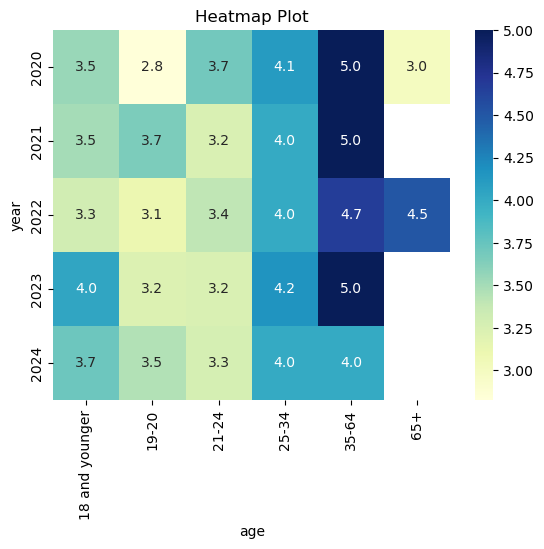


Generating plot: Violin Age Distribution


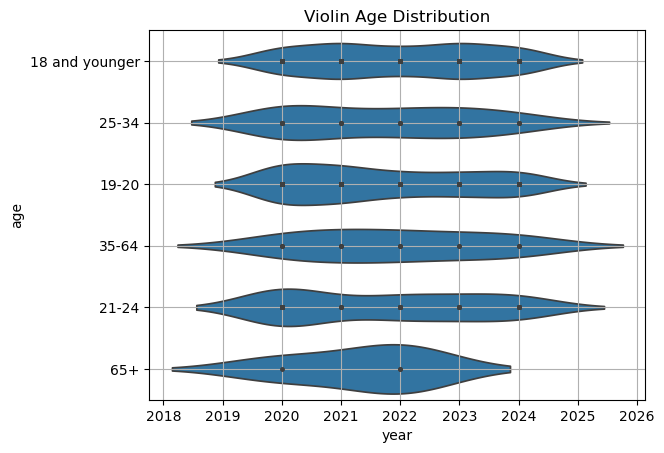

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import parallel_coordinates

def heatmap_plot():
    pivot = df.groupby(['year', 'age'])['interest_in_more_classes'].mean().unstack()
    sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlGnBu')
    plt.title('Heatmap Plot')
    plt.savefig('heatmap_plot.png', bbox_inches='tight')
    plt.show()

def violin_age_distribution():
    sns.violinplot(data=df, x='year', y='age', inner='point')
    show_and_save_plot('Violin Age Distribution', use_legend=False)

def show_and_save_plot(title, use_legend=True):
    print(f"\nGenerating plot: {title}\n{'='*60}")
    plt.title(title)
    if use_legend:
        plt.legend(title='Year')
    plt.grid(True)
    plt.savefig(f"{title.replace(' ', '_').replace('-', '').lower()}.png", bbox_inches='tight')
    plt.show()


heatmap_plot()
violin_age_distribution()

# Graph the Answer To This Question

## Research Question
**How does gender relate to the “the degree program” category? Has that changed over time?**

---

## Relevant Columns

- **`curr_deg`** — Current degree.
- **`age`** — capturing student age.
- **`year`** — indicating the survey year.


In [91]:
# reset df to clean data
df = df_all_cleaned_data

# Review of Current Degree Data (`curr_deg`)

## Overview

In this section, we will analyze the data contained in the **`curr_deg`** column to assess its completeness, consistency, and relevance.


In [93]:
# extracted from the majors surey pdf
majors_survey_degree_programs = [
    "Computer Science",
    "Information Technology",
    "CIS Game Development Option",
    "Digital Media Technology",
    "Technical Studies, Applied Associate of Science",
    "Information Security Certificate of Achievement",
    "Web Development Certificate of Achievement",
    "Data Analytics Certificate of Achievement",
    "Challenger Program",
    "ShareTime CSIP Program",
    "Non Degree seeking",
    "Undecided"
]

In [94]:
# this data was extracted from different sources:
# ccm web pages:
#   https://www.ccm.edu/admissions/high-school-dual-enrollment/
shared_time_programs = [
    'Criminal Justice',
    'Culinary Arts and Hospitality',
    'Cybersecurity and Information Protection (CIP)',
    'Engineering, Design and Advanced Manufacturing (EDAM)',
]    
    
# program names extracted from ccm reports:
#   https://www.ccm.edu/wp-content/uploads/2024/10/Factbook-Fall-2024.pdf
#   https://www.ccm.edu/wp-content/uploads/facstaff/Factbook-Spring-2023.pdf
#   https://www.ccm.edu/wp-content/uploads/2024/09/Factbook-Graduates-AY-2022-2023.pdf
#   https://www.ccm.edu/wp-content/uploads/2024/09/Factbook-Graduates-AY-2023-2024.pdf
program_names_from_ccm_reports = [
    "30 Credit High School Completion Program",
    "Academy Students",
    "Advanced Electronics Certificate of Achievement",
    "Agribusiness",
    "Aviation Flight Technology",
    "Basic Electronics Certificate of Achievement",
    "Business Administration",
    "Business Professional",
    "CDA Education Certificate of Achievement",
    "CIS - Administrative Support Option",
    "CIS - Computer Science Option",
    "CIS - Game Development Option",
    "CIS - Management Information System Option",
    "CIS - Technical Support Option",
    "Challenger Program - Non-Matric",
    "Chemical Technology",
    "Chemical Technology: Environmental Science Option",
    "Child and Family Studies",
    "Childcare Specialist Certificate",
    "Communication",
    "Computer Aided Drafting Certificate",
    "Computer Science",
    "Computer Science - Data Science Option",
    "Criminal Justice",
    "Criminal Justice - Justice Studies Option",
    "Criminal Justice - Share Time on Campus",
    "Culinary Arts Certificate of Achievement",
    "Culinary Arts and Science",
    "Cybersecurity and Information Protection",
    "Data Analytics Certificate of Achievement",
    "Digital Media Technology",
    "ESOL - English for Speakers of Other Languages",
    "Early Childhood Education",
    "Electronics Engineering Tech: Biomedical Equipment Option",
    "Electronics Engineering Technology",
    "Engineering Science",
    "Engineering Technology Certificate of Achievement",
    "Exercise Science",
    "Finance Certificate of Achievement",
    "Fine Arts: Animation Option",
    "Fine Arts: Dance Option",
    "Fine Arts: Design Option",
    "Fine Arts: Visual Arts Option",
    "Fire Science Education (W/Passaic)",
    "Foundations in Business Certificate of Achievement",
    "Garden Center Certificate of Achievement",
    "Graphic Design",
    "Grounds Maintenance Certificate of Achievement",
    "Hospitality Management",
    "Hospitality Management: Restaurant & Culinary Mgt. Option",
    "Hospitality Mgmt & Event Planning Certificate of Achievement",
    "Information Security Certificate of Achievement",
    "Information Technology",
    "Landscape Contractor Certificate of Achievement",
    "Landscape Design Certificate of Achievement",
    "Landscape Entrepreneur",
    "Landscape Management and Design",
    "Legal Assistant Certificate of Achievement",
    "Liberal Arts & Sciences Journalism Option",
    "Liberal Arts & Sciences: Broadcasting Arts & Technology",
    "Liberal Arts & Sciences: Humanities/Music",
    "Liberal Arts & Sciences: Humanities/Social Science",
    "Liberal Arts & Sciences: International Studies",
    "Liberal Arts & Sciences: Pre-Social Work Option",
    "Mechanical CAD Certificate of Achievement",
    "Mechanical Engineering Technology",
    "Media Technology Certificate of Achievement",
    "Music Technology: Electronic Music Option",
    "Music Technology: Music Recording Option",
    "Musical Theatre",
    "Networking Opt - Telecommunications Systems Technology",
    "Non Matric Rutgers Exchange Registration",
    "Non-Matric Tested/Not Required",
    "Non-Matriculated",
    "Non-Matriculated-Visiting Students",
    "Nursing",
    "Occupational Therapy Assistant",
    "Paramedic Science",
    "Personal Trainer Certificate of Achievement",
    "Photography Technology",
    "Public Administration",
    "Public Health",
    "Radiography",
    "Respiratory Therapy",
    "Science & Mathematics: Biology Option",
    "Science & Mathematics: Chemistry Option",
    "Science & Mathematics: Mathematics Option",
    "Small Business Management Certificate of Achievement",
    "Social Media Marketing & Communications",
    "Technical Studies",
    "Telecommunications Systems Technology",
    "Titans Express - Dual Enrollment",
    "Virtual Reality",
    "Web Development Certificate of Achievement"
]

In [95]:
all_degrees = sorted(set(majors_survey_degree_programs \
                + program_names_from_ccm_reports \
                + shared_time_programs))
all_degrees_lower = [x.lower() for x in all_degrees]

search_degree_boolean_matrix =  df['curr_deg'].str.strip().str.lower().isin(all_degrees_lower)

In [96]:
df = df[['gender','curr_deg','year']]
search_degree_boolean_matrix =  df['curr_deg'].str.strip().str.lower().isin(all_degrees_lower)
df_degree_filter = df[search_degree_boolean_matrix]
df_degrees = df_degree_filter[['gender', 'curr_deg', 'year']]

In [97]:
df = df_degree_filter.value_counts(dropna=False).reset_index()
df.columns = ["gender", "curr_deg", "year", "count"]

<Figure size 1200x2160 with 0 Axes>

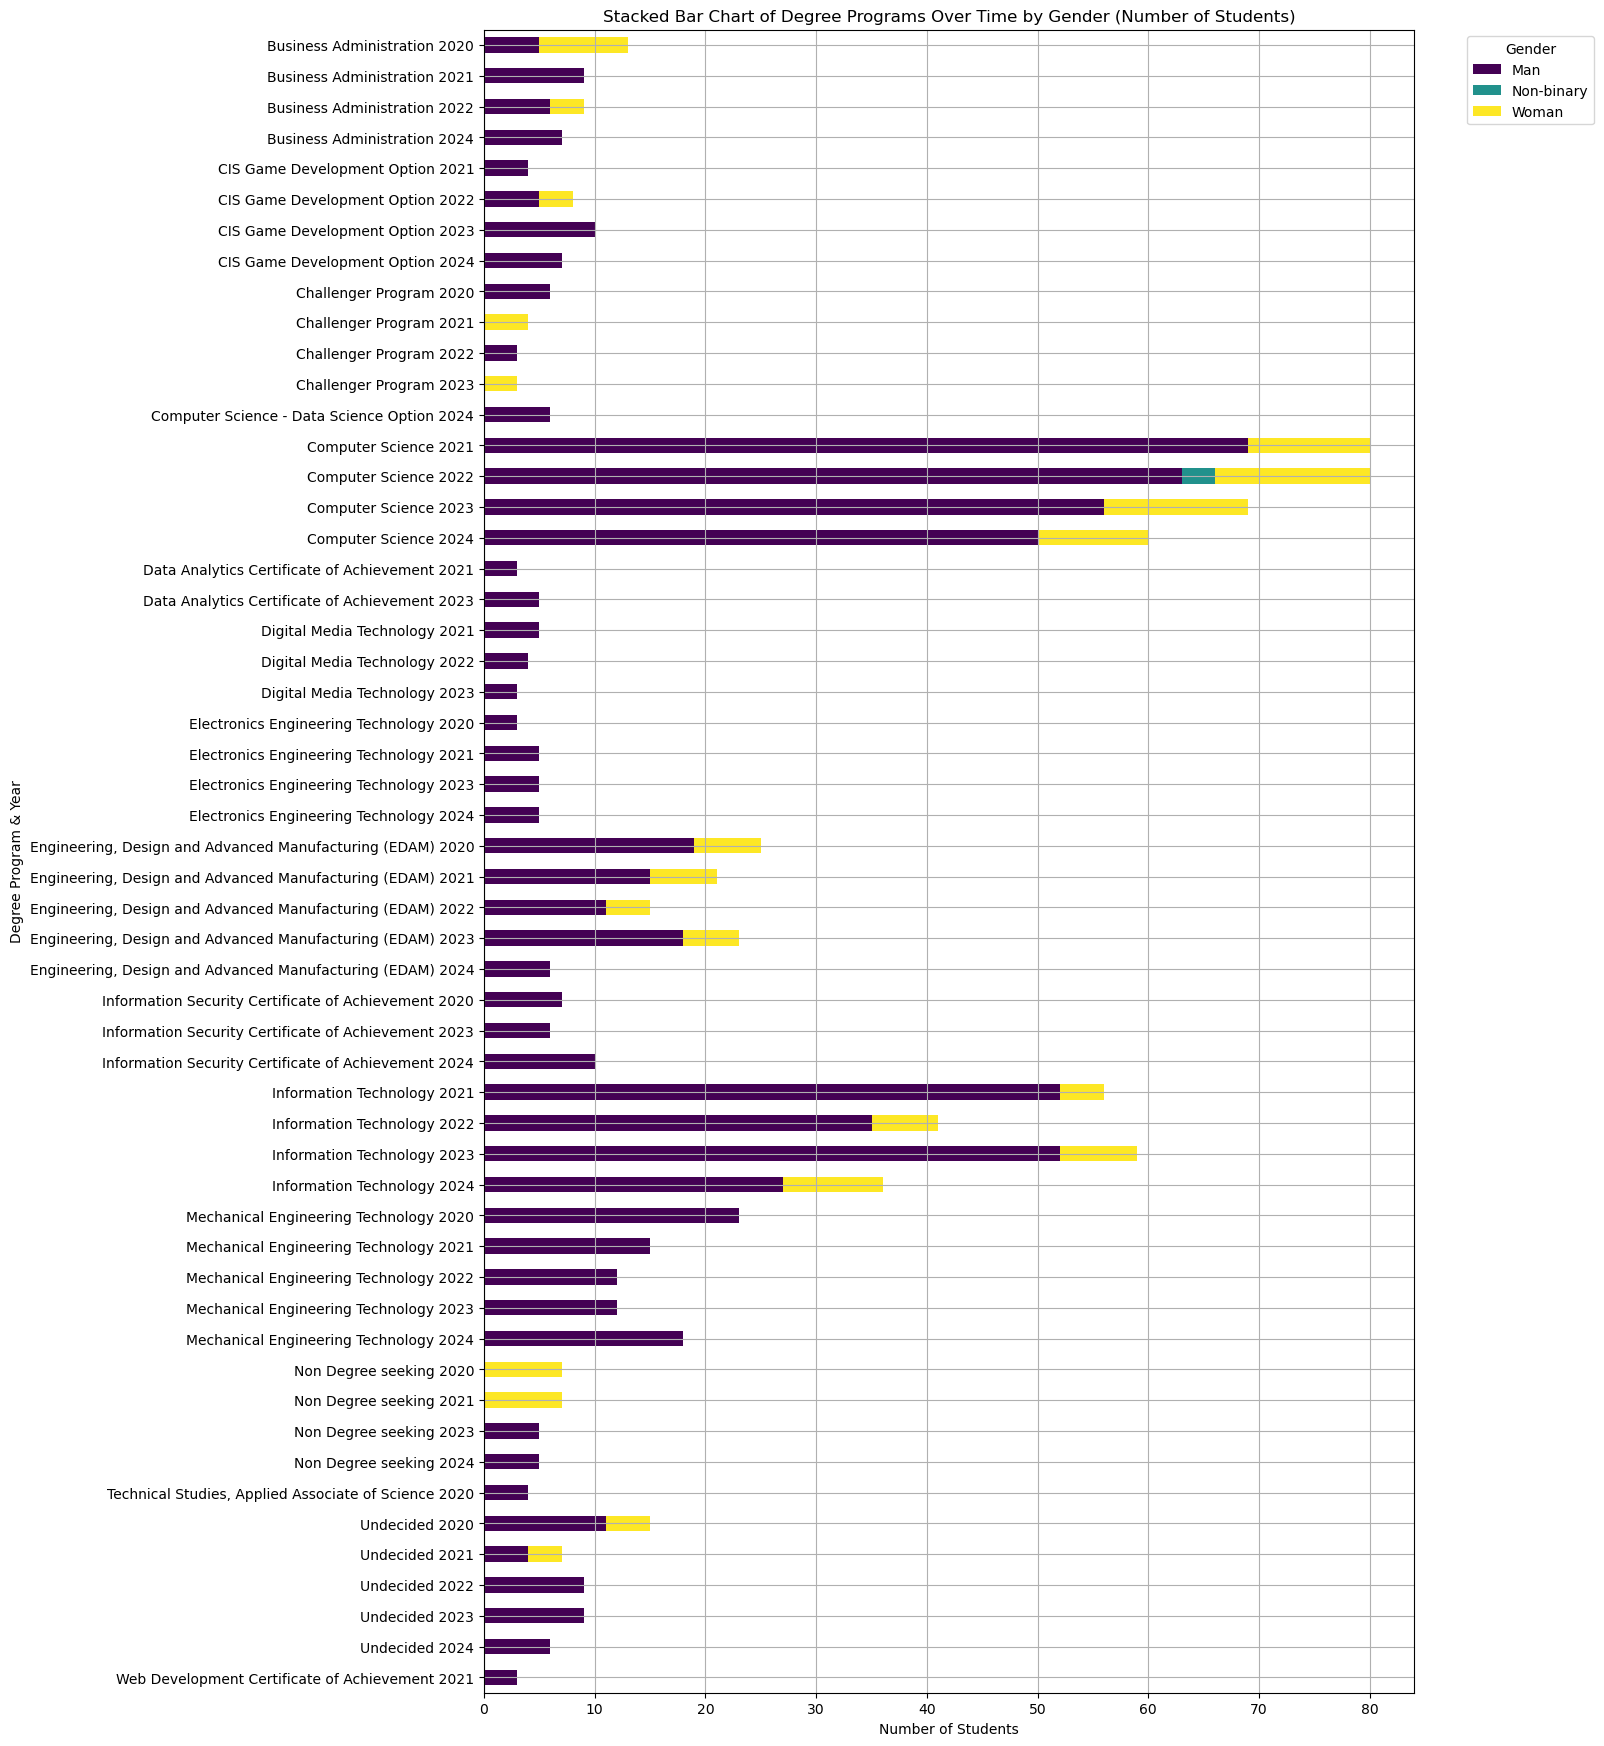

In [98]:
# applying first comment changes
import matplotlib.pyplot as plt

# Filter data to exclude low counts
df_filtered = df[df["count"] > 2]

# Combine degree and year into a cleaner label
df_filtered = df_filtered.sort_values(by=["curr_deg", "year"])
df_filtered["label"] = df_filtered.groupby("curr_deg")["year"].transform(
    lambda x: [x.iloc[0]] + [str(yr) for yr in x.iloc[1:]]
)
df_filtered["label"] = df_filtered["curr_deg"] + " " + df_filtered["label"].astype(str)

# Pivot for plotting
df_pivot_stacked = df_filtered.pivot_table(
    index="label", columns="gender", values="count", aggfunc="sum"
).fillna(0)

# Sort so labels are ordered in descending order
df_pivot_stacked = df_pivot_stacked.sort_index(ascending=False)

# Plot
plt.figure(figsize=(12, len(df_pivot_stacked) * 0.4))  # Dynamically scale height

df_pivot_stacked.plot(kind="barh", stacked=True, colormap="viridis", figsize=(12, len(df_pivot_stacked) * 0.4))

plt.title("Stacked Bar Chart of Degree Programs Over Time by Gender (Number of Students)")
plt.xlabel("Number of Students")
plt.ylabel("Degree Program & Year")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

# Save and show
plt.savefig("stacked_bar_chart_updated_01.jpeg", format="jpeg", bbox_inches="tight")
plt.show()


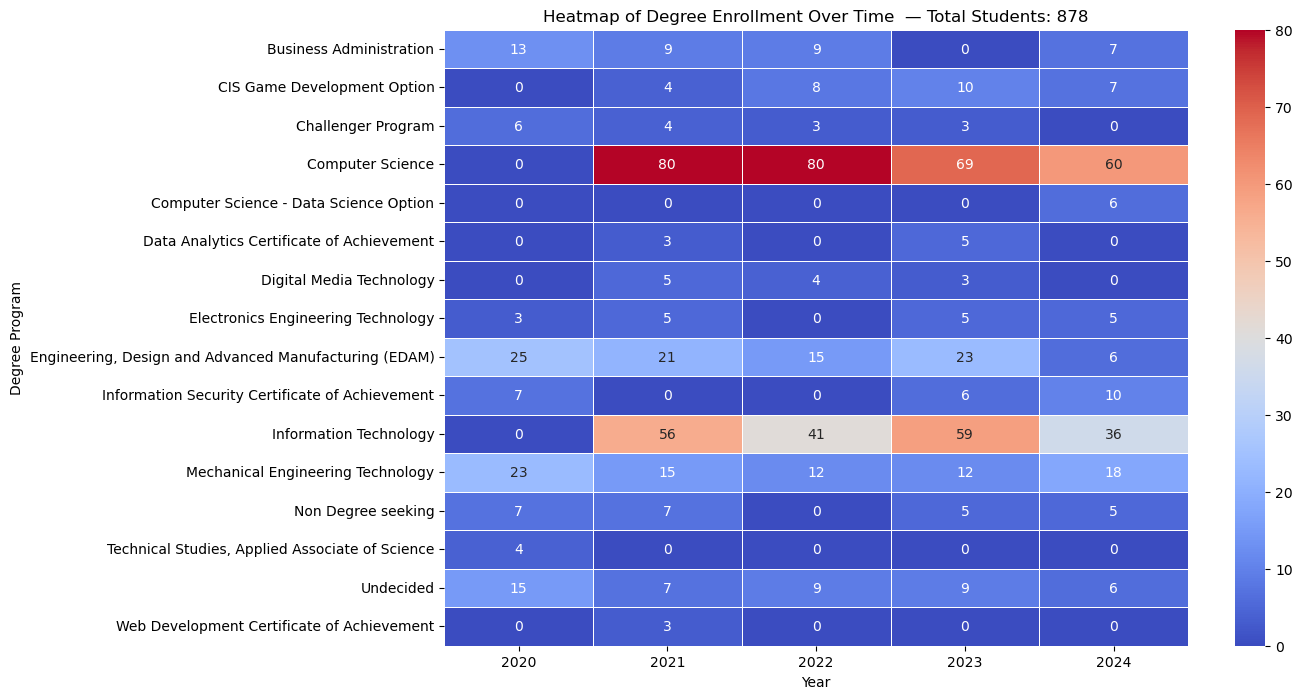

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total number of students after filtering
total_students = df_filtered["count"].sum()

# Creating a heatmap to represent the filtered data
plt.figure(figsize=(12, 8))

# Pivoting data for the heatmap (Summing counts across gender)
df_heatmap = df_filtered.pivot_table(index="curr_deg", columns="year", values="count", aggfunc="sum").fillna(0)

# Plotting the heatmap
sns.heatmap(df_heatmap, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

# Updated title with total student count
plt.title(f"Heatmap of Degree Enrollment Over Time  — Total Students: {total_students:,}")
plt.xlabel("Year")
plt.ylabel("Degree Program")

# Save the plot as a JPEG file
plt.savefig("gender_and_degree_part_02_total.jpeg", format="jpeg", bbox_inches="tight")

plt.show()


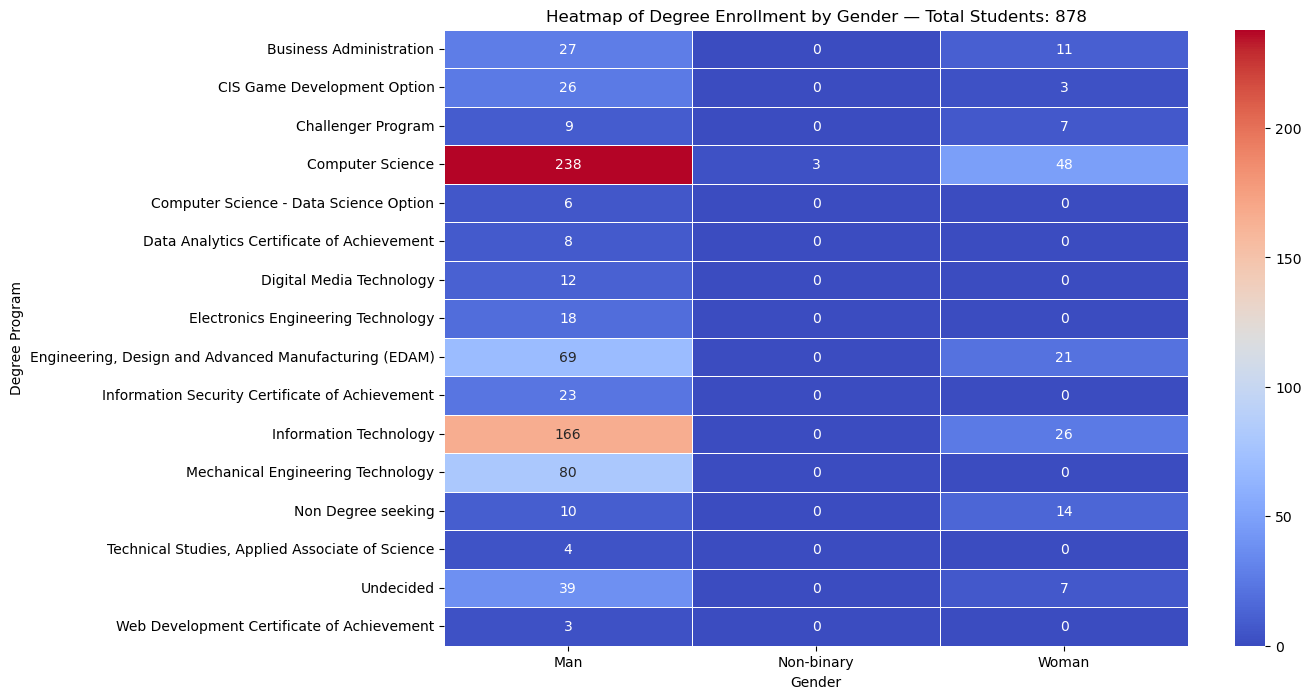

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total number of students after filtering
total_students = df_filtered["count"].sum()

# Creating a heatmap to represent enrollment counts based on gender and degree programs
plt.figure(figsize=(12, 8))

# Pivoting data for the heatmap (Summing counts across years)
df_gender_heatmap = df_filtered.pivot_table(index="curr_deg", columns="gender", values="count", aggfunc="sum").fillna(0)

# Plotting the heatmap
sns.heatmap(df_gender_heatmap, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

# Updated title with total student count
plt.title(f"Heatmap of Degree Enrollment by Gender — Total Students: {total_students:,}")
plt.xlabel("Gender")
plt.ylabel("Degree Program")

# Save the plot as a JPEG file
plt.savefig("gender_and_degree_part_03_heading.jpeg", format="jpeg", bbox_inches="tight")

plt.show()


# Graph the Answer To This Question

## Research Question
**Compare the race/ethnicity demographics of the survey over time (2020-2024). What are the changes over time, if any?**

---

## Relevant Columns
The data contains two relevant columns:
- **`year`** — representing the year of the survey.
- **`ethnicity`** — representing the self-reported ethnicity of respondents.

### Goal
The goal is to create a **line chart** that tracks the top 5 ethnicities over the available years to observe trends.


## Added Constants to Control Output

To manage the appearance and clarity of visualizations, I introduced the following constants:

- **`NUMBER_TO_GRAPH`** — Controls how many values (e.g., ethnicities) are displayed. By default, this is set to **5**.
- **`FIGURE_Y_HEIGHT`** — Controls the height of the figure. If you increase **`NUMBER_TO_GRAPH`**, it's recommended to also increase this value to ensure a **more granular and readable view**.

These constants provide flexibility to **customize output** based on the level of detail needed.


In [105]:
df = df_all_cleaned_data[['ethnicity','year']]

<Figure size 1200x600 with 0 Axes>

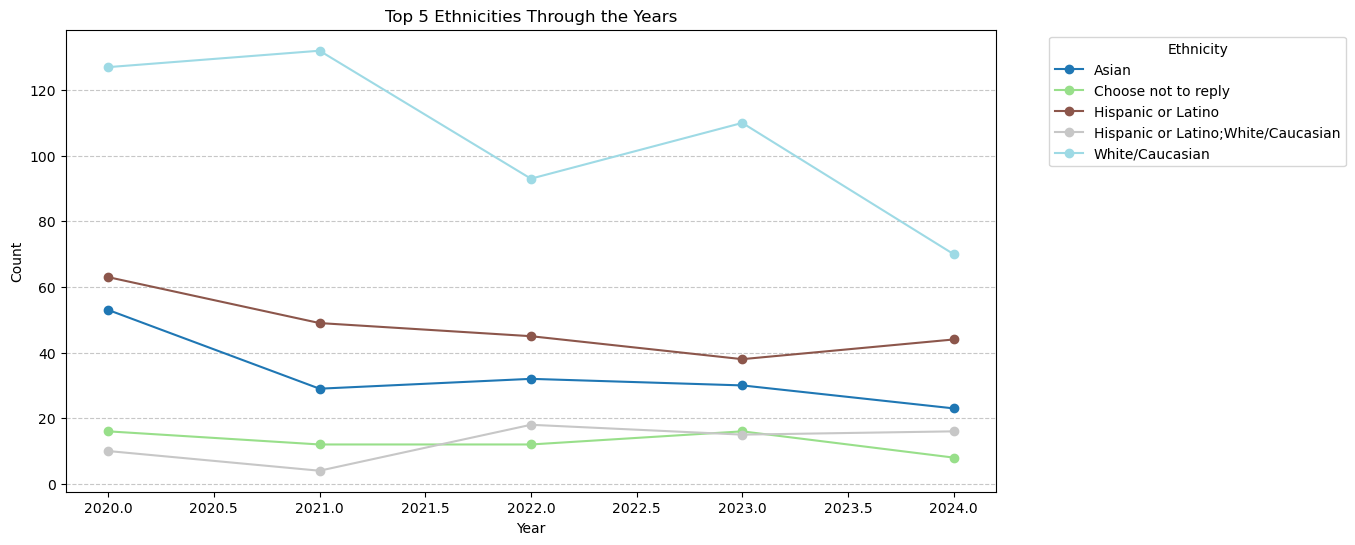

In [106]:
# jz - added constants to get different views
NUMBER_TO_GRAPH=5
FIGURE_Y_HIGHT=6
FIGURE_X_LENGTH=12

# Count occurrences of each ethnicity
ethnicity_counts = df['ethnicity'].value_counts()

# Get the top 5 ethnicities
top_ethnicities = ethnicity_counts.head(NUMBER_TO_GRAPH).index

# Filter the DataFrame to include only the top 5 ethnicities
df_top_x = df[df['ethnicity'].isin(top_ethnicities)]

# Count occurrences of each ethnicity per year
ethnicity_year_counts = df_top_x.groupby(['year', 'ethnicity']).size().unstack()

# Plotting the line graph
plt.figure(figsize=(FIGURE_X_LENGTH, FIGURE_Y_HIGHT))
ethnicity_year_counts.plot(kind='line', marker='o', colormap='tab20', figsize=(FIGURE_X_LENGTH, FIGURE_Y_HIGHT))

plt.title(f'Top {NUMBER_TO_GRAPH} Ethnicities Through the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


# Graph the Answer To This Question

## Research Question
**How does the degree program they are enrolled in, relate to their motivation for the degree?**

---

## Relevant Columns
The data contains two relevant columns:
- **`curr_deg`** —current_degree.
- **`mot*`** — motivation for degrees.




In [108]:
df = df_all_cleaned_data
df = df[search_degree_boolean_matrix]

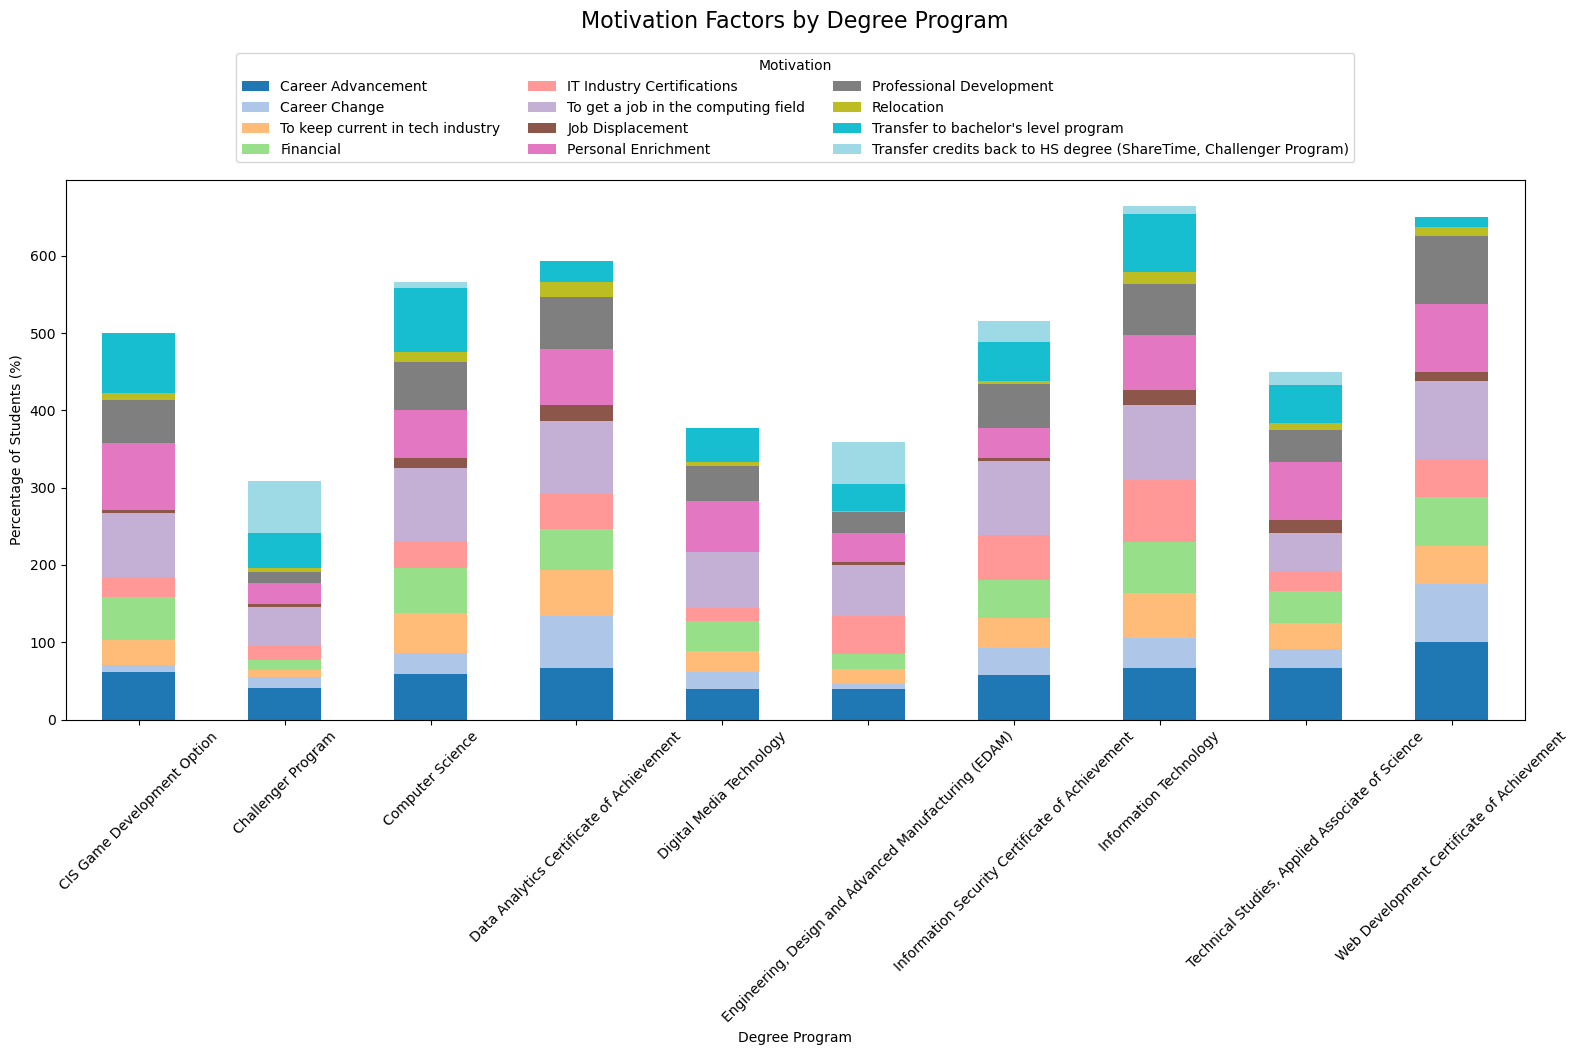

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df is your DataFrame
# motivation_column_to_text_dict is already defined

# Step 1: Filter only motivation columns + degree column
motivation_cols = list(motivation_column_to_text_dict.keys())
subset_df = df[['curr_deg'] + motivation_cols].copy()

# Step 2: Convert Yes/No to binary (1 = Yes, 0 = No)
for col in motivation_cols:
    subset_df[col] = subset_df[col].map({'Yes': 1, 'No': 0})

# Step 3: Group by degree and calculate mean (% of students who said Yes)
motivation_by_degree = subset_df.groupby('curr_deg')[motivation_cols].mean() * 100

# Step 3.5: Drop degree programs with all-zero motivation values
motivation_by_degree = motivation_by_degree[motivation_by_degree.sum(axis=1) != 0]

# Step 4: Rename columns to their readable labels
motivation_by_degree.rename(columns=motivation_column_to_text_dict, inplace=True)

# Step 5: Plot
fig, ax = plt.subplots(figsize=(16, 10))
motivation_by_degree.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

# Set title above everything
fig.suptitle('Motivation Factors by Degree Program', fontsize=16, y=1.05)

# Add legend (key) below the title, above the chart
ax.legend(
    title='Motivation',
    bbox_to_anchor=(0.5, 1.02),
    loc='lower center',
    ncol=3
)

# Axis labels and ticks
ax.set_ylabel('Percentage of Students (%)')
ax.set_xlabel('Degree Program')
ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Leave room for title + legend

plt.show()


<Figure size 1400x1000 with 0 Axes>

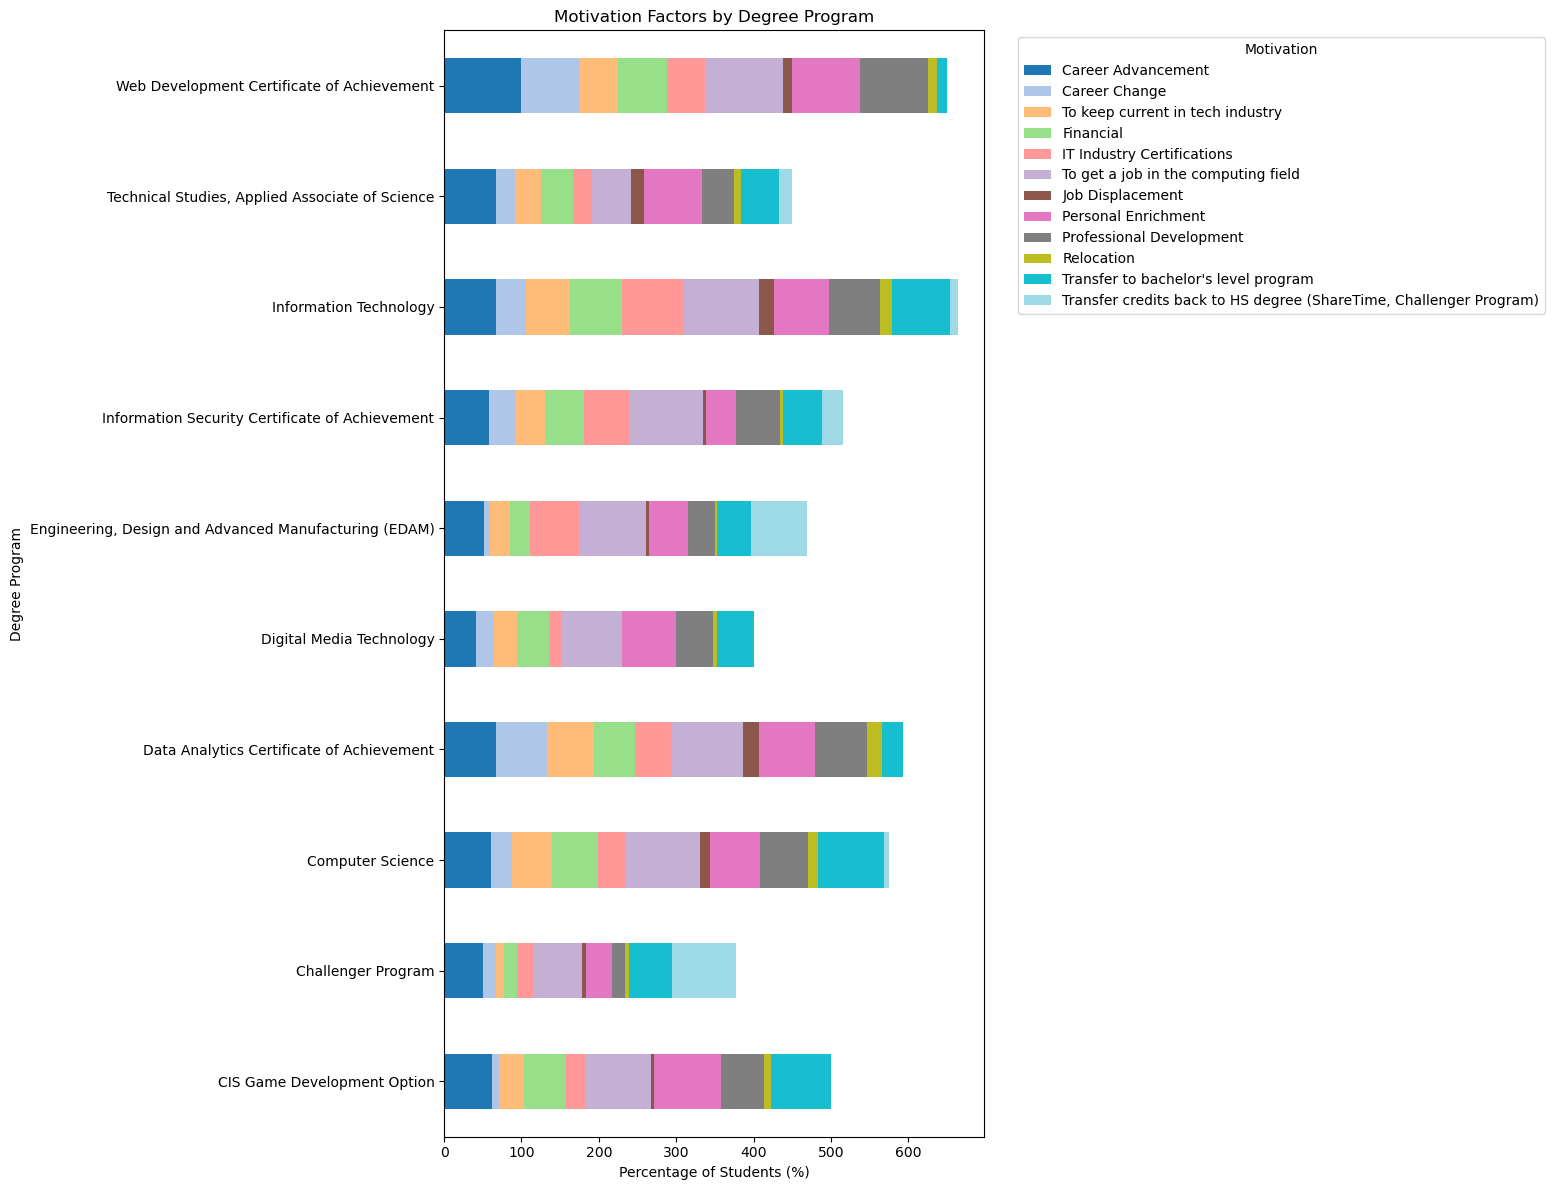

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df is your DataFrame
# motivation_column_to_text_dict is already defined

# Step 1: Filter only motivation columns + degree column
motivation_cols = list(motivation_column_to_text_dict.keys())
subset_df = df[['curr_deg'] + motivation_cols].copy()

# Step 2: Drop rows where all motivation columns are not 'Yes'
# Keep rows where at least one 'mot_' column is 'Yes'
subset_df = subset_df[subset_df[motivation_cols].apply(lambda row: (row == 'Yes').any(), axis=1)]

# Step 3: Convert Yes/No to binary (1 = Yes, 0 = No)
for col in motivation_cols:
    subset_df[col] = subset_df[col].map({'Yes': 1, 'No': 0})

# Step 4: Group by degree and calculate mean (% of students who said Yes)
motivation_by_degree = subset_df.groupby('curr_deg')[motivation_cols].mean() * 100

# Step 5: Rename columns to their readable labels
motivation_by_degree.rename(columns=motivation_column_to_text_dict, inplace=True)

# Step 6: Plot horizontal stacked bar chart
plt.figure(figsize=(14, 10))
motivation_by_degree.plot(kind='barh', stacked=True, figsize=(16, 12), colormap='tab20')
plt.title('Motivation Factors by Degree Program')
plt.xlabel('Percentage of Students (%)')
plt.ylabel('Degree Program')
plt.legend(title='Motivation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


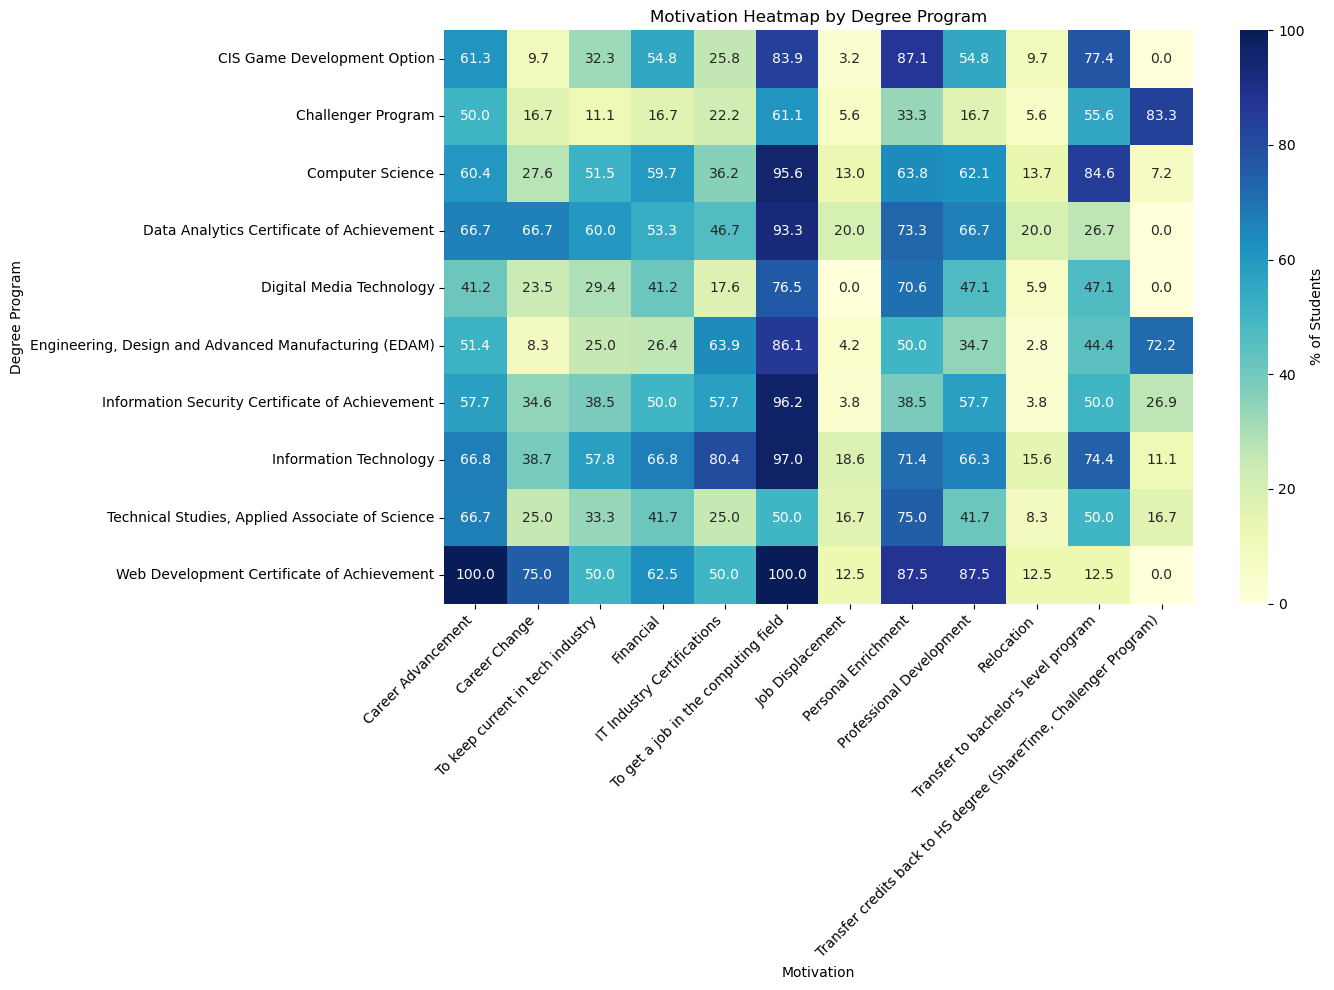

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# (use same cleaned and filtered 'motivation_by_degree' from previous code)

plt.figure(figsize=(14, 10))
sns.heatmap(motivation_by_degree, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': '% of Students'})
plt.title("Motivation Heatmap by Degree Program")
plt.xlabel("Motivation")
plt.ylabel("Degree Program")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


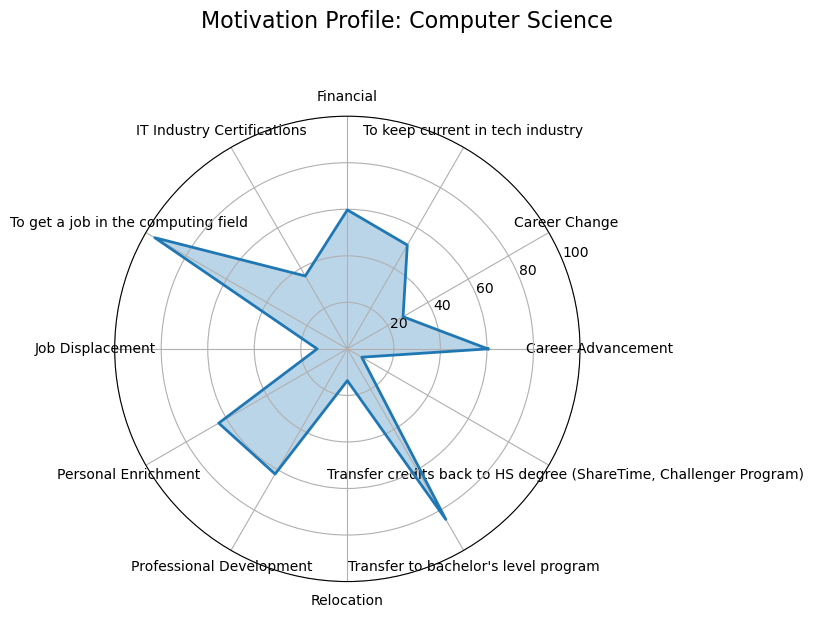

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Pick one degree program, e.g., 'Computer Science'
degree_name = 'Computer Science'  # change as needed

if degree_name in motivation_by_degree.index:
    values = motivation_by_degree.loc[degree_name].values
    labels = motivation_by_degree.columns.tolist()

    # Radar setup
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    values = np.concatenate((values, [values[0]]))  # close the loop
    angles += angles[:1]

    # Plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.3)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_ylim(0, 100)

    # Use fig.suptitle for better title placement above the chart
    fig.suptitle(f"Motivation Profile: {degree_name}", fontsize=16, y=.9)

    plt.tight_layout()
    plt.show()
else:
    print(f"Degree '{degree_name}' not found.")


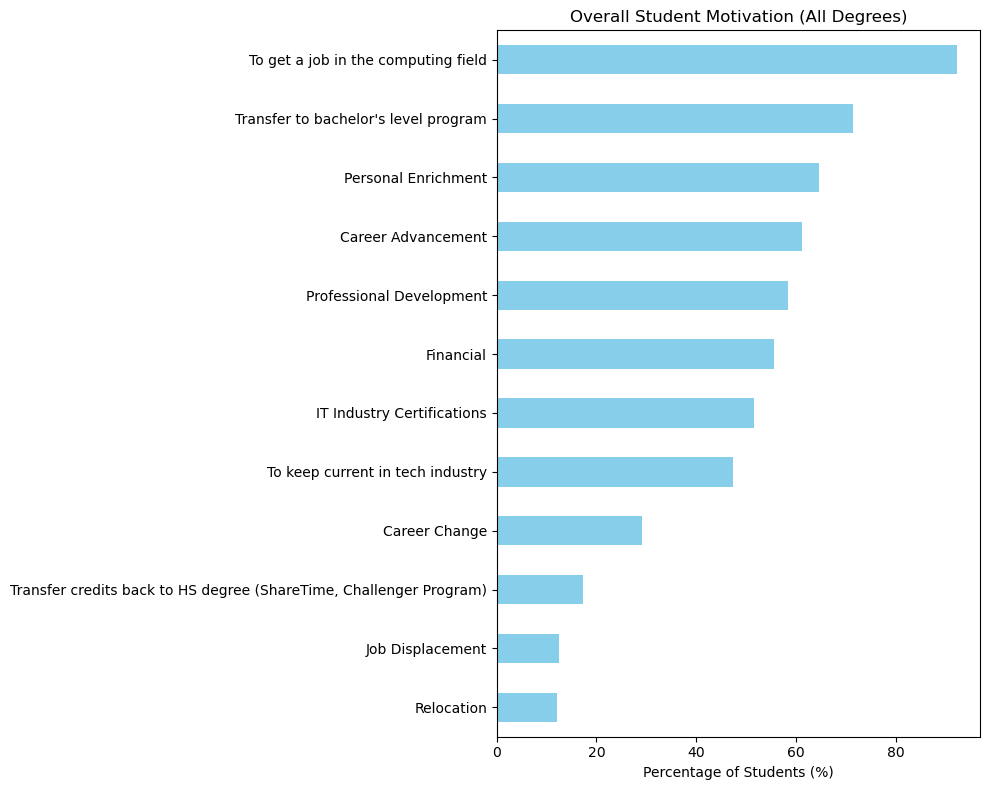

In [113]:
# Grouped Bar Chart for Top Motivations Across All Degrees¶
# Calculate overall motivation percentages (not grouped by degree)
overall_motivation = subset_df[motivation_cols].mean() * 100
overall_motivation.index = [motivation_column_to_text_dict[col] for col in overall_motivation.index]

# Plot
overall_motivation.sort_values(ascending=True).plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title('Overall Student Motivation (All Degrees)')
plt.xlabel('Percentage of Students (%)')
plt.tight_layout()
plt.show()


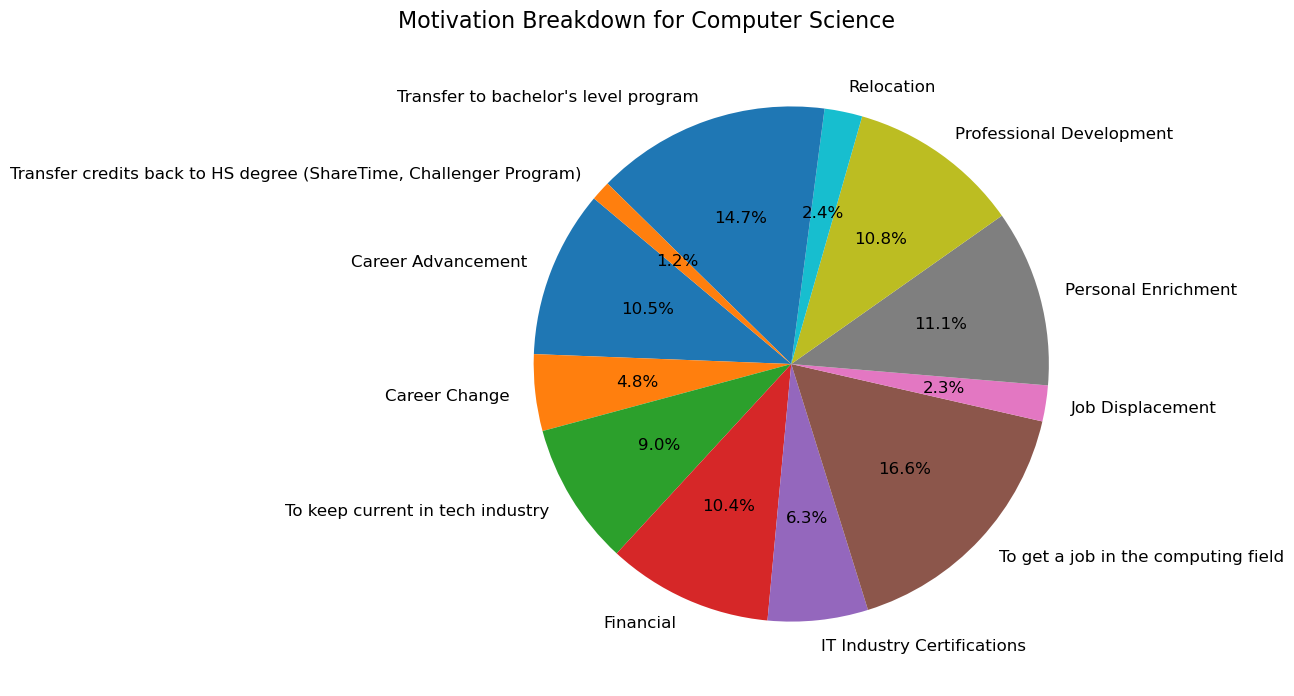

In [114]:
import matplotlib.pyplot as plt

# Pie Chart for a Single Degree Program (Motivation Breakdown)
# Choose a degree
degree_name = 'Computer Science'

if degree_name in motivation_by_degree.index:
    values = motivation_by_degree.loc[degree_name]
    values = values[values > 0]  # exclude motivations with 0%

    # Create larger figure
    fig, ax = plt.subplots(figsize=(12, 12))  # Increase size here
    wedges, texts, autotexts = ax.pie(
        values,
        labels=values.index,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 12}
    )

    # Add title above the pie chart
    fig.suptitle(f"Motivation Breakdown for {degree_name}", fontsize=16, y=.78)

    plt.tight_layout()
    plt.show()
else:
    print(f"Degree '{degree_name}' not found.")
